# 다음 분기에 어떤 게임을 설계해야 할까?

In [1]:
# 1. 데이터불러오기

import pandas as pd
import numpy as np

df = pd.read_csv('vgames2.csv', index_col=0)         # 파일을 url로도 읽을 수 있으나, 계속되는 작업이기에 다운받아 사용함
df

# 총 데이터 16598행

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 전처리 전 게임이름 기준의 데이터는 몇 개인가?
df_by_name = df.groupby('Name').NA_Sales.sum()
df_by_name

Name
'98 Koshien                                    0.15
.hack//G.U. Vol.1//Rebirth                        0
.hack//G.U. Vol.2//Reminisce                   0.11
.hack//G.U. Vol.2//Reminisce (jp sales)           0
.hack//G.U. Vol.3//Redemption                     0
                                             ...   
thinkSMART: Chess for Kids                     0.01
uDraw Studio                                   1.67
uDraw Studio: Instant Artist               0.010.08
wwe Smackdown vs. Raw 2006                     1.57
¡Shin Chan Flipa en colores!                      0
Name: NA_Sales, Length: 11493, dtype: object

In [3]:
# 2. 전처리.
# 1) 각 행별로 N/A는 값을 없애고, 
# 2) 1)을  포함한 결측값 있는 행 제거

df = df.replace('N/A','')
df = df.dropna(axis=0)
df

# https://rfriend.tistory.com/263

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 3) df['Year'] 4자릿수로 만들기.
def digit_int_4(number):

    if number in range(0,20):
        return number+2000

    elif number in range(86, 100):
        return number+1900
    
    else:
        return number
    
df['Year']=df['Year'].apply(digit_int_4)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
# 4) NA_Sales 등 K랑 M 들어간 row 삭제하기
# https://www.kejisen.com/ko/article/197030387.html
# TypeError: unhashable type: 'list'

drop_values = ['K','M']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]
df



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
# 4-2 ) NA_Sales 등 출고량 object->numeric으로 변경

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [7]:
# 5) (df['Year'] == 2017) | (df['Year'] == 2016)인 row 데이터 제거
# 2017은 3개밖에 없고, 2015년이 580개인 반면 2016년도가 321개이기에 의미 없다고 판단함.

# 5 -1) df['Year'] float->int변환

def toInt(float):
    return int(float)

df['Year'] = df['Year'].apply(toInt)


# 4-2) df['Year'] 이 2016년이나 2017년이면 제거.

df = df[df.Year < 2016]
df

# df['Year'].value_counts(ascending=True) 각 해별로 얼마만큼의 데이터가 있는지 확인하는 함수

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15147,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15148,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
15149,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15150,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
# 전처리 후 게임이름 기준의 데이터는 기준 몇개인가?

df_by_name_new = df.groupby('Name').NA_Sales.sum()
df_by_name_new

Name
'98 Koshien                                0.15
.hack//G.U. Vol.1//Rebirth                 0.00
.hack//G.U. Vol.2//Reminisce               0.11
.hack//G.U. Vol.2//Reminisce (jp sales)    0.00
.hack//G.U. Vol.3//Redemption              0.00
                                           ... 
thinkSMART FAMILY!                         0.03
thinkSMART: Chess for Kids                 0.01
uDraw Studio                               1.67
uDraw Studio: Instant Artist               0.09
¡Shin Chan Flipa en colores!               0.00
Name: NA_Sales, Length: 10702, dtype: float64

## 1. 지역에 따라서 선호하는 게임 장르가 다를까?

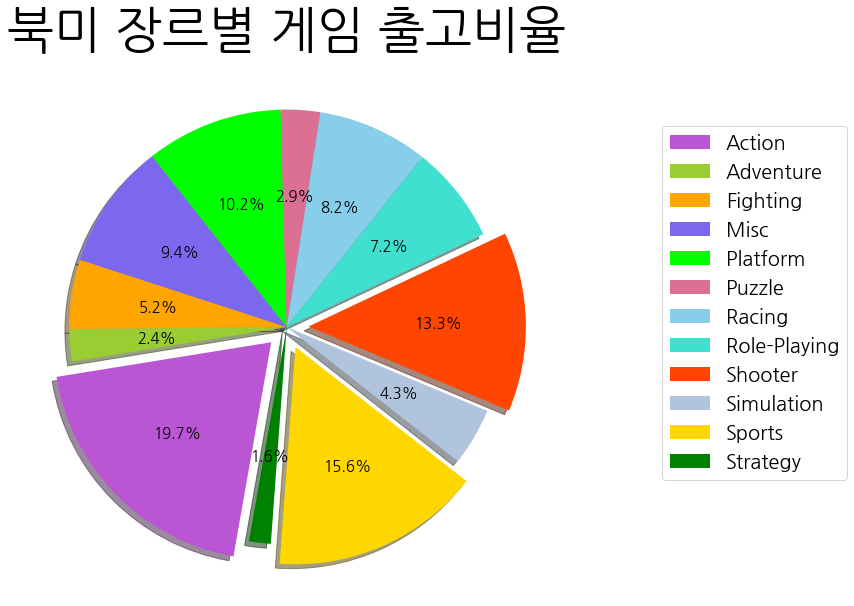

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']

# https://developer-ankiwoong.tistory.com/229

labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 1. 장르별 북미 출고량
plt.title('북미 장르별 게임 출고비율', size=50, weight='bold')

NA_Sales_by_Genre = df.groupby('Genre').NA_Sales.sum()
ratio_N = NA_Sales_by_Genre

pie = ax.pie(ratio_N, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()
#https://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.legend

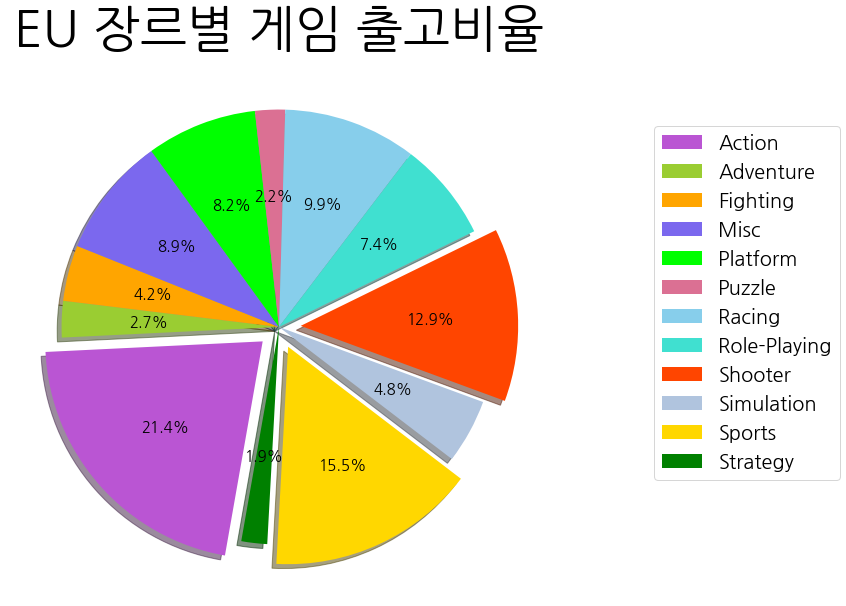

In [11]:
# EU
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']

    
# 2. 장르별 유럽 출고량
plt.title('EU 장르별 게임 출고비율', size=50, weight='bold')

EU_Sales_by_Genre = df.groupby('Genre').EU_Sales.sum()
ratio_E = EU_Sales_by_Genre

pie = ax.pie(ratio_E, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()



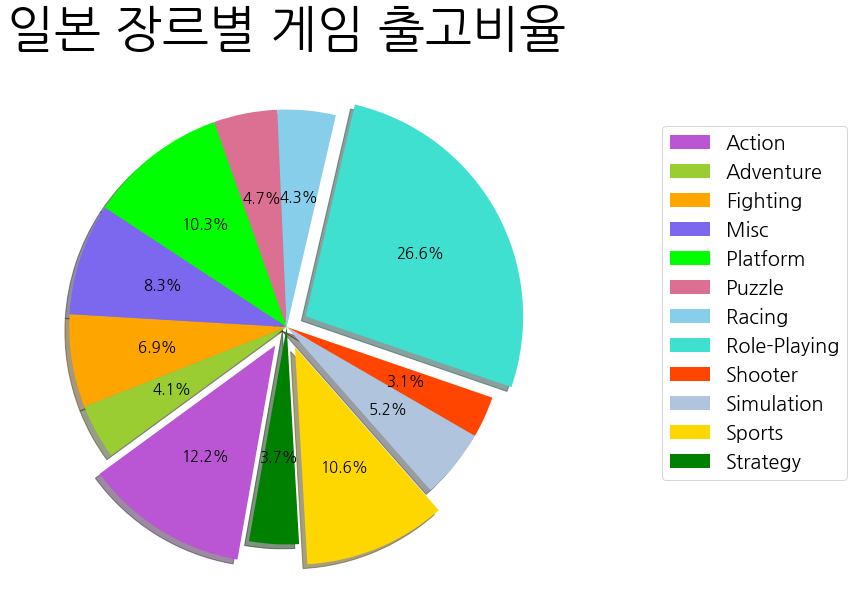

In [12]:
### JAPAN
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 3. 장르별 일본 출고량
plt.title('일본 장르별 게임 출고비율', size=50, weight='bold')

JP_Sales_by_Genre = df.groupby('Genre').JP_Sales.sum()
ratio_J = JP_Sales_by_Genre
explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기

pie = ax.pie(ratio_J, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

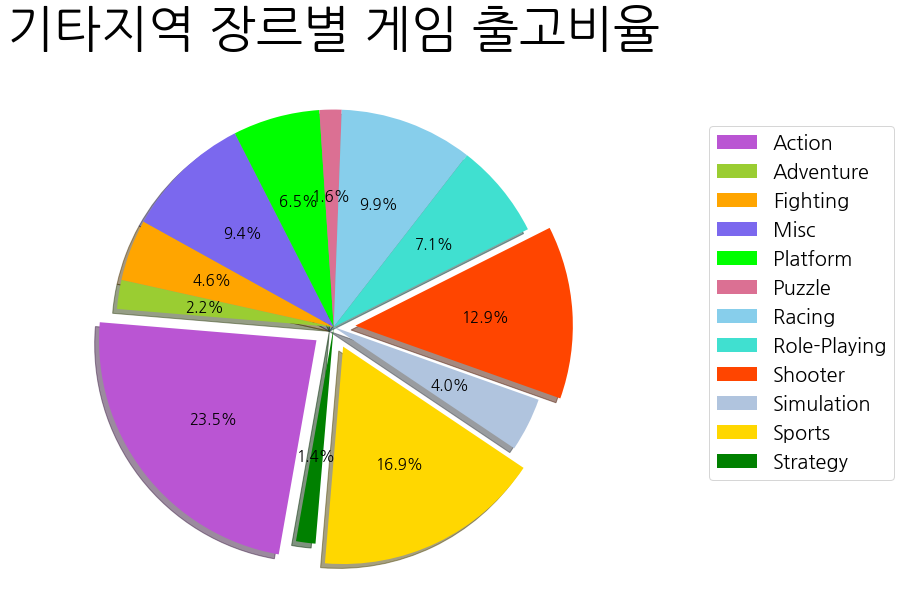

In [13]:
### etc
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 4. 장르별 타지역 출고량
plt.title('기타지역 장르별 게임 출고비율', size=50, weight='bold')

Other_Sales_by_Genre = df.groupby('Genre').Other_Sales.sum()
ratio_O = Other_Sales_by_Genre

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기

pie = ax.pie(ratio_O, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

## 2. 연도별 게임의 트렌드가 있을까?

In [14]:
# total 출고량 (4개로 구분된 지역별 출고량 합산)

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15147,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15148,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15149,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15150,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [15]:
set(df.Genre)

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [16]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'],
      dtype='object')

In [17]:
# -때문에 _로 이름 바꿈
df = df.replace('Role-Playing','Role_playing')

In [18]:
# 잘바뀌었는지 확인
set(df.Genre)

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role_playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [1]:
# 연도별 장르매출액 구분

In [19]:
Total_Yearly_Genre = df.pivot_table(index='Year',columns='Genre',values='Total_Sales', aggfunc = 'sum')
Total_Yearly_Genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.47,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1981,12.82,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,4.43,NaN,31.10,NaN,6.17,NaN
1985,3.52,NaN,1.05,NaN,41.67,3.21,NaN,NaN,1.00,0.04,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,3.38,NaN
1987,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
1988,1.74,NaN,NaN,NaN,20.27,5.58,2.14,5.88,0.51,0.03,3.60,NaN


In [20]:
# 기존의 Genre의 종류와 새로운 dataframe의 컬럼내용이 같은지 확인
Total_Yearly_Genre.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role_playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [21]:
set(df.Genre)

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role_playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [22]:
# df.pivot_table(index='Year',columns='Genre',values='Total_Sales') 

# 이 코드를 안쓰고 예전에 썼던 코드

# 장르별 데이터 나누기

Action_df = (df[(df['Genre'] == 'Action')])   # (df['Genre'].isin(['Action'])) 와 같음.
Adventure_df = (df[(df['Genre'] == 'Adventure')])
Fighting_df = (df[(df['Genre'] == 'Fighting')])
Misc_df = (df[(df['Genre'] == 'Misc')])
Platform_df = (df[(df['Genre'] == 'Platform')])
Puzzle_df = (df[(df['Genre'] == 'Puzzle')])
Racing_df = (df[(df['Genre'] == 'Racing')])
Role_df = (df[(df['Genre'] == 'Role-Playing')]) # 얘만 가운데 작대기때문에 이름바꿈
Shooter_df = (df[(df['Genre'] == 'Shooter')])
Simulation_df = (df[(df['Genre'] == 'Simulation')])
Sports_df = (df[(df['Genre'] == 'Sports')])
Strategy_df = (df[(df['Genre'] == 'Strategy')])

# 장르별 데이터를 Year별로 그룹해서 총출고량 합산
# 다음번엔 pivot_table로 한줄로 코드를 끝내자. df.pivot_table(index='Year',columns='Genre',values='Total_Sales')

'''Total_Yearly_Action = Action_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Adventure = Adventure_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Fighting = Fighting_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Misc = Misc_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Platform = Platform_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Puzzle = Puzzle_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Racing = Racing_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Role = Role_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Shooter = Shooter_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Simulation = Simulation_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Sports = Sports_df.groupby('Year').Total_Sales.sum()
Total_Yearly_Strategy = Strategy_df.groupby('Year').Total_Sales.sum()

Total_Sales_by_yearly_Genre = [Total_Yearly_Action, Total_Yearly_Adventure, Total_Yearly_Fighting, Total_Yearly_Misc, Total_Yearly_Platform, 
     Total_Yearly_Puzzle, Total_Yearly_Racing, Total_Yearly_Role, Total_Yearly_Shooter, Total_Yearly_Simulation, 
    Total_Yearly_Sports, Total_Yearly_Strategy
    ]
Total_Yearly_Genre = pd.DataFrame(Total_Sales_by_yearly_Genre)
Total_Yearly_Genre.reset_index()
Total_Yearly_Genre.index = labels_by_G
Total_Yearly_Genre = Total_Yearly_Genre.T
Total_Yearly_Genre.columns
'''
# ...crosstab으로 해보자..!

"Total_Yearly_Action = Action_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Adventure = Adventure_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Fighting = Fighting_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Misc = Misc_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Platform = Platform_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Puzzle = Puzzle_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Racing = Racing_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Role = Role_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Shooter = Shooter_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Simulation = Simulation_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Sports = Sports_df.groupby('Year').Total_Sales.sum()\nTotal_Yearly_Strategy = Strategy_df.groupby('Year').Total_Sales.sum()\n\nTotal_Sales_by_yearly_Genre = [Total_Yearly_Action, Total_Yearly_Adventure, Total_Yearly_Fighting, Total_Yearly_Misc, Total_Yearly_Platform, \n     Total_Yearly_Puzzle, Tota

In [23]:
Total_Yearly_Genre.loc[1980:1989].mean()

Genre
Action           4.913000
Adventure        2.390000
Fighting         2.413333
Misc             1.642000
Platform        12.588889
Puzzle           8.955714
Racing           2.116000
Role_playing     3.812500
Shooter          5.977000
Simulation       0.170000
Sports           3.286667
Strategy              NaN
dtype: float64

In [24]:
# 1990년대 게임 장르별 평균출고량
Total_Yearly_Genre.loc[1990:1999].mean()

Genre
Action          12.172000
Adventure        4.444444
Fighting        13.191111
Misc             7.871250
Platform        19.245000
Puzzle           3.894000
Racing          13.271000
Role_playing    16.438000
Shooter          7.457778
Simulation       4.999000
Sports          14.327000
Strategy         6.190000
dtype: float64

In [25]:
Total_Yearly_Genre.loc[2000:2010].mean()

Genre
Action          84.865455
Adventure       12.339091
Fighting        21.329091
Misc            49.342727
Platform        34.870000
Puzzle          11.448182
Racing          41.516364
Role_playing    40.627273
Shooter         44.569091
Simulation      24.835455
Sports          77.658182
Strategy         7.989091
dtype: float64

In [26]:
Total_Yearly_Genre.loc[2010:2015].mean()

Genre
Action          101.776667
Adventure         9.735000
Fighting         12.133333
Misc             36.936667
Platform         17.885000
Puzzle            3.496667
Racing           19.316667
Role_playing     45.045000
Shooter          68.605000
Simulation       11.651667
Sports           48.090000
Strategy          5.381667
dtype: float64

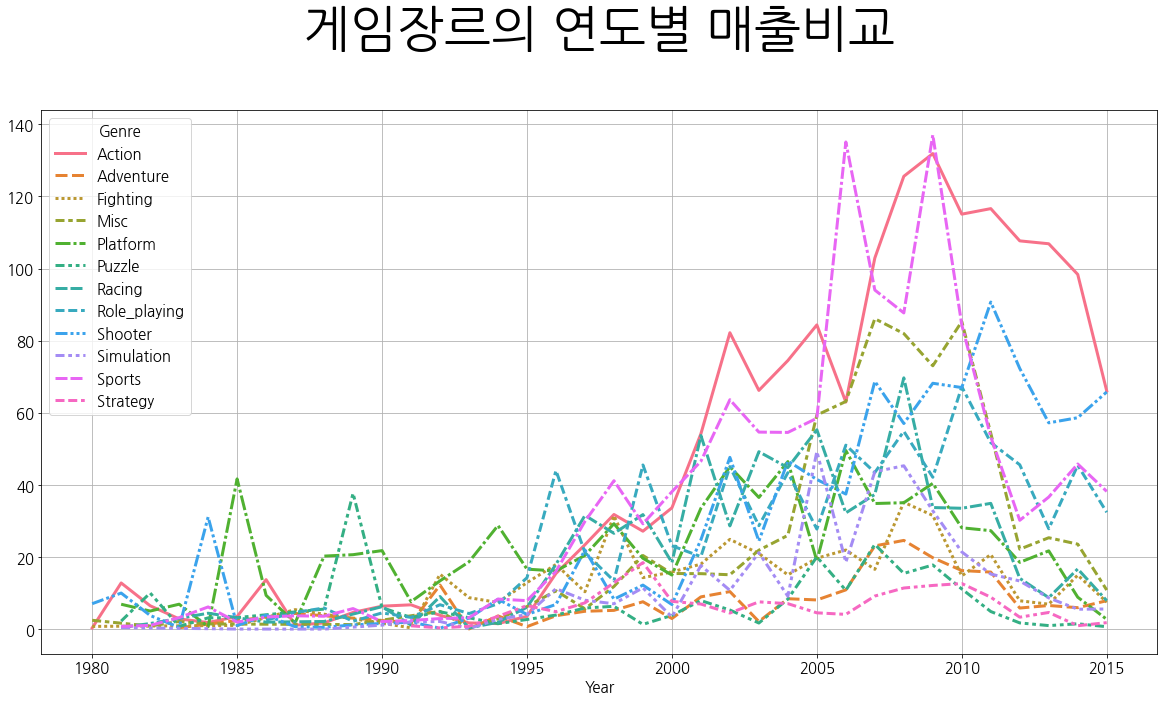

In [27]:
import seaborn as sns

# seaborn 라이브러리
import seaborn as sns

# 폰트설정
import matplotlib.pyplot as plt 

plt.rc('font', family='NanumGothic') 
plt.rc('axes', unicode_minus=False)

# 캔버스설정
plt.rcParams["figure.figsize"] = (20, 10)   ## 캔버스 사이즈 생성(가로/세로)
plt.rcParams['lines.linewidth'] = 3  # 라인두께
plt.rcParams['axes.grid'] = True # 차트내 격자선(grid) 표시 여부     # 지웟는데 안지워짐 이유는 모르겠움

# https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html
# 타이틀
plt.title('게임장르의 연도별 매출비교\n', size=50, weight='bold')

# 주어진 그래프 그리기
sns.lineplot(data = Total_Yearly_Genre);

In [28]:
# 1985년 플랫폼 게임 중 가장 출고량이 높은 것은?

Platform_df[Platform_df['Year'] == 1985]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
68,Wrecking Crew,NES,1985,Platform,Nintendo,0.00,0.00,0.51,0.00,0.51
2959,Balloon Fight,NES,1985,Platform,Nintendo,0.39,0.09,0.43,0.01,0.92
3867,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [29]:
# 2000년대 가장 인기있던 장르는 액션과 스포츠!
# 해당 장르의 가장 인기있던 게임은?

Action_df_2000 = Action_df[(Action_df.Year >= 2000) & (Action_df.Year < 2010)]
Sports_df_2000 = Sports_df[(Sports_df.Year >= 2000) & (Sports_df.Year < 2010)]

### 2000-2009 가장 인기있던 액션게임 

In [30]:
Action_df_2000.sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
13399,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
4905,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
8959,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
4427,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
12728,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
15041,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
710,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
962,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
12398,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
7598,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05


### 2000-2009 가장 인기있던 스포츠게임 

In [31]:
Sports_df_2000.sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2690,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3094,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3165,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9962,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
7769,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.05
353,Mario & Sonic at the Olympic Games,DS,2008,Sports,Sega,1.64,2.48,0.44,0.58,5.14
4775,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91
6757,Tony Hawk's Pro Skater 2,PS,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
9683,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58
13630,Madden NFL 07,PS2,2006,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49


In [32]:
# 2000년대 가장 인기있던 장르는 액션과 스포츠!
# 해당 장르의 가장 인기있던 게임은?

Action_df_2010 = Action_df[(Action_df.Year >= 2010)]
Shooter_df_2010 = Shooter_df[(Shooter_df.Year >= 2010)]
Sports_df_2010 = Sports_df[(Sports_df.Year >= 2010)]

### 2010-2015 가장 인기있던 스포츠게임 

In [33]:
Sports_df_2010.sort_values(by='Total_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2437,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
2517,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
13511,Zumba Fitness,Wii,2010,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
12336,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
2845,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60
5147,Kinect Sports,X360,2010,Sports,Microsoft Game Studios,3.92,1.78,0.03,0.51,6.24
9328,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
13210,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
9918,FIFA 12,X360,2011,Sports,Electronic Arts,0.84,2.79,0.02,0.53,4.18
7121,Sports Champions,PS3,2010,Sports,Sony Computer Entertainment,2.12,1.14,0.10,0.51,3.87


### 2010-2015 가장 인기있던 액션게임 5가지

In [34]:
Action_df_2010.sort_values(by='Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3206,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1851,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
8272,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25
10859,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82
14864,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60


### 2010-2015 가장 인기있던 총게임 5가지

In [35]:
Shooter_df_2010.sort_values(by='Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2596,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
5740,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
8306,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3905,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
5869,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.  

In [36]:
# 전체 출고량 중 제일 큰 값 찾기(Name기준으로 Total_Sales 구하기(플랫폼마다도 구분이 되서 합하는게 필요함))

df_by_name_3 = df.groupby('Name').Total_Sales.sum()

# MAX Total 값
df_by_name_3_total_value = df.groupby('Name').Total_Sales.sum().max()
print('\n',df_by_name_3_total_value) 


 82.74000000000001


### 1980년-2015년 총 출고량 가장 높은 게임 10가지

In [37]:
# Total 출고량 높은 순서대로 정렬
The_Best_Sales = df_by_name_3.sort_values(ascending=False)

pd.DataFrame(The_Best_Sales).head(10)

,Total_Sales
Name,
Wii Sports,82.74
Super Mario Bros.,45.31
Grand Theft Auto V,39.54
Tetris,35.84
Mario Kart Wii,35.83
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.38
Call of Duty: Modern Warfare 3,30.84
New Super Mario Bros.,30.01


In [38]:
# Wii Sports의 정보
df_Wii = (df [df['Name'] == 'Wii Sports'])
df_Wii

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2690,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [39]:
# Super Mari Bros의 정보
df_Super_Mario_Bros = (df [df['Name'] == 'Super Mario Bros.'])
df_Super_Mario_Bros

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3867,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
11937,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


## 4. 다음 분기에 설계해야하는 게임은?

In [40]:
# 미국의 연도별 플랫폼 게임 출고량
df_by_P = df.loc[:,'Name':'NA_Sales']

Total_Yearly_Platform = pd.crosstab(index = df_by_P.Year, columns = df_by_P.Platform, values=df_by_P.NA_Sales, aggfunc = np.sum)
Total_Yearly_Platform 

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,9.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,31.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,26.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.42,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.69,NaN,NaN,NaN,NaN,0.82,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
Total_Yearly_Platform.sum()

Platform
2600     78.26
3DO       0.00
3DS      69.46
DC        5.43
DS      371.22
GB      107.75
GBA     165.99
GC      125.80
GEN      19.27
GG        0.00
N64     118.71
NES     119.20
NG        0.00
PC       88.32
PCFX      0.00
PS      313.18
PS2     543.76
PS3     367.78
PS4      77.99
PSP     103.25
PSV      14.86
SAT       0.21
SCD       1.00
SNES     61.23
TG16      0.00
WS        0.00
Wii     476.56
WiiU     34.05
X360    551.86
XB      173.41
XOne     71.38
dtype: float64

''

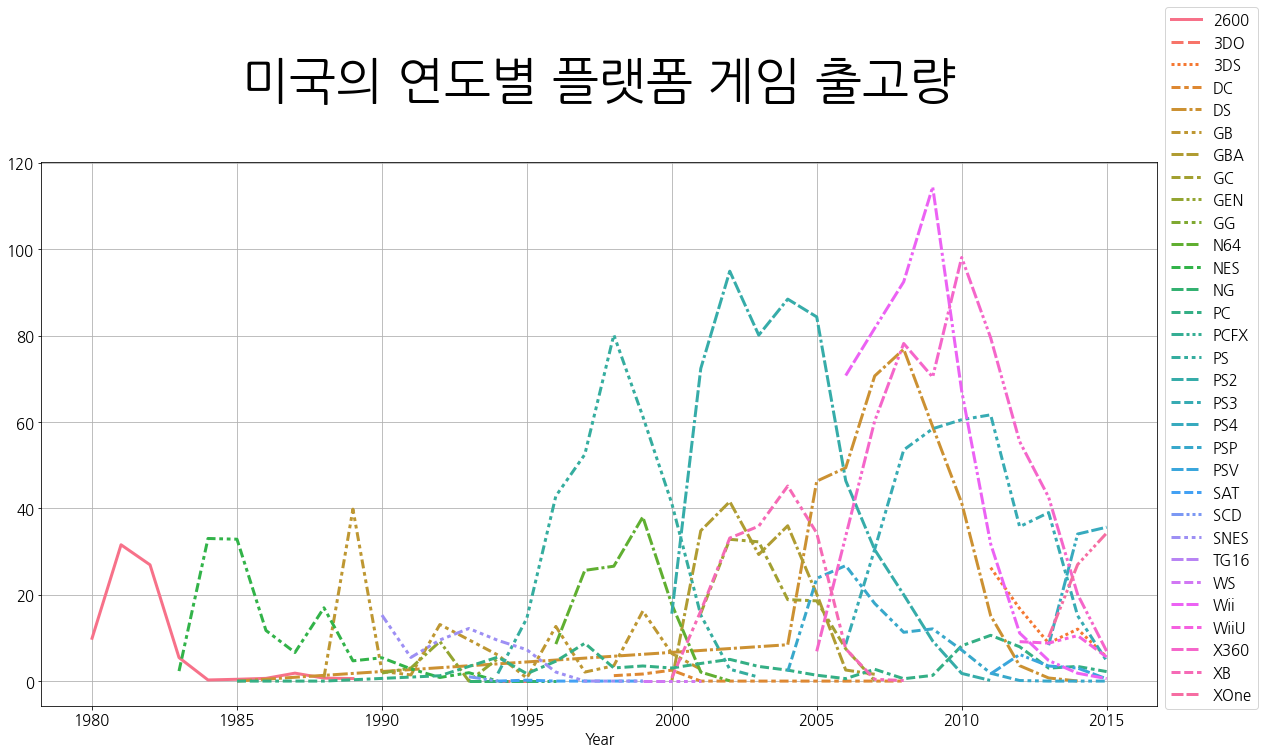

In [42]:
import seaborn as sns

# seaborn 라이브러리
import seaborn as sns

# 폰트설정
import matplotlib.pyplot as plt 

plt.rc('font', family='NanumGothic') 
plt.rc('axes', unicode_minus=False)

# 캔버스설정
plt.rcParams["figure.figsize"] = (20, 10)   ## 캔버스 사이즈 생성(가로/세로)
plt.rcParams['lines.linewidth'] = 3  # 라인두께
plt.rcParams['axes.grid'] = True # 차트내 격자선(grid) 표시 여부     # 지웟는데 안지워짐 이유는 모르겠움

# https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html

# 타이틀
plt.title('미국의 연도별 플랫폼 게임 출고량\n', size=50, weight='bold')


# 주어진 그래프 그리기
sns.lineplot(data = Total_Yearly_Platform)

# 범주

plt.legend(prop={'size': 15}, bbox_to_anchor=(1,1.3))# 범례 표시 # bbox_to_anchor하면 표 밖으로 범례가 나감. 숫자로 위치조정.
;

### Wii와 플레이스테이션2 중 어떤 플랫폼을 사용해야 출고량이 더 높을지에 대한 ttest 가설검정


__귀무가설 : Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션2를 플랫폼으로 사용한 일반회사 출고량의 평균보다 높을 것이다.__  
__대립가설 : Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션2를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.__

In [43]:
# Platform Wii 사용게임 중 닌텐도를 제외한 회사의 출고량
df_Wii_Total_Sales = df[df['Platform'] == 'Wii']
df_Wii_Total_Sales_new = df_Wii_Total_Sales['Total_Sales'][~df['Publisher'].isin(['Nintendo'])]

In [44]:
# Platform PS2 사용게임 중 sony를 제외한 회사의 출고량
df_PS2_Total_Sales = df[df['Platform'] == 'PS2']
df_PS2_Total_Sales_new = df_PS2_Total_Sales['Total_Sales'][~df['Publisher'].isin(['Sony Computer Entertainment', 'Sony Computer Entertainment America', 'Sony Computer Entertainment Europe', 'Sony Music Entertainment', 'Sony Online Entertainment'])]

In [45]:
np.mean(df_Wii_Total_Sales_new), np.mean(df_PS2_Total_Sales_new)

(0.429128160418483, 0.5464085667215816)

In [46]:
from scipy import stats

stats1, pv1 = stats.ttest_ind(df_Wii_Total_Sales_new, df_PS2_Total_Sales_new, alternative='less' )
stats2, pv2 = stats.ttest_ind(df_Wii_Total_Sales_new, df_PS2_Total_Sales_new, alternative='greater')

alpha = 0.05

if pv1 < alpha:
    ans = 'Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션2를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.'
elif pv2 < alpha:
    ans = 'Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션2를 플랫폼으로 사용한 일반회사 출고량의 평균보다 높을 것이다.'
else:
    ans = '없음'

pv1, pv2, ans

(0.000724897655764761,
 0.9992751023442352,
 'Wii를 플랫폼으로 사용한 일반회사 출고량의 평균은 플레이스테이션2를 플랫폼으로 사용한 일반회사 출고량의 평균보다 낮거나 같을 것이다.')

# 결론 : PS2의 액션게임을 만들어 가장 큰 북미시장에 진출해야함

추가적으로 고려해야할 사항은 2021년 현재 ps5까지 출시된 상황으로, ps 버전별 추가분석이 필요해보임. (해당데이터는 ps5에 대한 내용이 없음)